# Carregando dados no Pandas

In [1]:
import pandas as pd

resenha = pd.read_csv("imdb-reviews-pt-br.csv")
resenha.head()

,id,text_en,text_pt,sentiment
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg


Analizando dados

In [2]:
print("Negativo\n")
print(resenha["text_pt"][200])

Negativo

Este é o terceiro filme em um mês que eu assisti que não saiu do jeito que eu esperava. Os dois primeiros são A Dália Negra e Hollywoodland, nenhum dos quais deu novas idéias de quem cometeu os crimes. Eu sempre tive um fascínio com OVNIs e estava tão empolgado para ver um novo filme sobre o tema da investigação sobre OVNIs que não era um comédia. Mas depois de 30 minutos, tudo deu muito errado. Eu poderia ter defendido a atuação, os ângulos de câmera, os estereótipos se houvesse uma boa história sobre perseguir OVNIs, mas nenhum aqui. Eu não estou dizendo que havia algo de errado com o assunto, mas Netflix empurrou este filme como um cético OVNI e um crente de OVNI investigando vários sitations.I parou de assistir a meio caminho. Não posso acreditar que perdi tanto tempo com este. Por favor, não cometa o mesmo erro que eu fiz.


In [3]:
print("Positivo\n")
print(resenha["text_pt"][49005])

Positivo

Uma excelente documentação. Eu pessoalmente me lembro disso crescendo em Nova York no início dos anos 80. Este filme é para qualquer um que não estava por perto durante esse período de tempo. Isso mostra a única coisa que a Underclass Gay Afro-Americana sentia que era unicamente deles e o amor e a camadrie que você vê são reais. As pessoas são reais e, infelizmente, poucas ainda estão vivas enquanto isso está sendo escrito. As bolas ainda estão seguras, mas não na medida em que estavam nos anos oitenta. Esse tempo se foi para sempre. Este é um bom filme pré "homo bandido". Quando o Queens estava realmente orgulhoso de ser extrovertido. Adeus a Storyville esta é outra era, mas muito documentada em todos os filmes de granizo!


Modificando parametros de clasificação

In [4]:
classificacao = resenha["sentiment"].replace(["neg","pos"], [0,1])

In [5]:
resenha["classificacao"]= classificacao
resenha.tail()

,id,text_en,text_pt,sentiment,classificacao
49454,49456,"Seeing as the vote average was pretty low, and...","Como a média de votos era muito baixa, e o fat...",pos,1
49455,49457,"The plot had some wretched, unbelievable twist...",O enredo teve algumas reviravoltas infelizes e...,pos,1
49456,49458,I am amazed at how this movieand most others h...,Estou espantado com a forma como este filme e ...,pos,1
49457,49459,A Christmas Together actually came before my t...,A Christmas Together realmente veio antes do m...,pos,1
49458,49460,Working-class romantic drama from director Mar...,O drama romântico da classe trabalhadora do di...,pos,1


Analizando proporção dos dados

In [6]:
print(resenha["classificacao"].value_counts())

0    24765
1    24694
Name: classificacao, dtype: int64


# Limpando dados

Tirando palavras irrelevantes na questão semântica

In [7]:
import nltk
from nltk import tokenize
import seaborn as sns

palavras_irrelevantes = nltk.corpus.stopwords.words("portuguese") # set de palavras irrelevantes em portuquês

def Tratamento_1(textos):

    token_espaco = tokenize.WhitespaceTokenizer() #Ferrameta que separa nos espaços em branco
    
    frase_processada = list()

    for opiniao in textos:
        nova_frase = list()
        palavras_texto = token_espaco.tokenize(opiniao)
        for palavra in palavras_texto:
            if palavra not in palavras_irrelevantes:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    
    return frase_processada

In [8]:
import time

tic = time.time()
resenha["tratamento_1"] = Tratamento_1(resenha["text_pt"])
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

resenha.head()

Tempo 27.78 segundos


,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é exemplo motivo maioria filmes ação mesm...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão é palavra apropriada eles, ..."


separação por acentos e passando novamente pelo tratamento 1

In [9]:
from string import punctuation

#Atualizando palavras irrelevantes com as pontuações
pontuacao = list()
for ponto in punctuation:
        pontuacao.append(ponto)

pontuacao_stopwords = pontuacao + palavras_irrelevantes


In [10]:
def Tratamento_2(Texto):
 
    token_pontuacao= tokenize.WordPunctTokenizer() #Ferramenta separa por espaços brancos e acentuação

    frase_processada = list()
    for opiniao in Texto:
        nova_frase = list()
        palavras_texto = token_pontuacao.tokenize(opiniao)
        for palavra in palavras_texto:
            if palavra not in pontuacao_stopwords:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    
    return frase_processada

In [11]:
tic = time.time()
resenha["tratamento_2"] = Tratamento_2(resenha["text_pt"])
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

resenha.head()

Tempo 31.50 segundos


,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é exemplo motivo maioria filmes ação mesm...,Este é exemplo motivo maioria filmes ação mesm...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão é palavra apropriada eles, ...",Filmes fotos latão é palavra apropriada verdad...


Tirando acentos

In [12]:
import unidecode

stopwords_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords] #atualizando as stopwords

In [13]:
def Tratamento_3(Texto):

    sem_acentos = [unidecode.unidecode(texto) for texto in Texto] #Tirando acentos das palavras
    resenha["tratamento_3"] = sem_acentos
    
    token_pontuacao= tokenize.WordPunctTokenizer() #Ferramenta separa por espaços brancos e acentuação

    frase_processada = list()
    for opiniao in resenha["tratamento_3"]:
        nova_frase = list()
        palavras_texto = token_pontuacao.tokenize(opiniao)
        for palavra in palavras_texto:
            if palavra not in stopwords_sem_acento:
                nova_frase.append(palavra)
        frase_processada.append(' '.join(nova_frase))
    return frase_processada

In [14]:
tic = time.time()
resenha["tratamento_3"] = Tratamento_3(resenha["tratamento_2"])
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

resenha.head()

Tempo 37.38 segundos


,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é exemplo motivo maioria filmes ação mesm...,Este é exemplo motivo maioria filmes ação mesm...,Este exemplo motivo maioria filmes acao mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão é palavra apropriada eles, ...",Filmes fotos latão é palavra apropriada verdad...,Filmes fotos latao palavra apropriada verdade ...


Não diferenciando maiúscula de minúscula

In [15]:
def Tratamento_4(Texto):

    token_pontuacao= tokenize.WordPunctTokenizer() #Ferramenta separa por espaços brancos e acentuação
    
    frase_processada = list()
    for opiniao in Texto:
        nova_frase = list()
        opiniao = opiniao.lower()
        palavra_texto = token_pontuacao.tokenize(opiniao)
        for palavra in palavra_texto:
            if palavra not in stopwords_sem_acento:
                nova_frase.append(palavra)
            
        frase_processada.append(' '.join(nova_frase))

    return frase_processada

In [16]:
tic = time.time()
resenha["tratamento_4"] = Tratamento_4(resenha["tratamento_3"])
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

resenha.head()

Tempo 23.79 segundos


,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é exemplo motivo maioria filmes ação mesm...,Este é exemplo motivo maioria filmes ação mesm...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão é palavra apropriada eles, ...",Filmes fotos latão é palavra apropriada verdad...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...


Remover sufixo das palavras (plural e singular, transformando a palavra em seu radical)

In [17]:
def Tratamento_5(Texto):

    stemmer = nltk.RSLPStemmer() #extrai o radical da palavra    
    token_pontuacao= tokenize.WordPunctTokenizer() #Ferramenta separa por espaços brancos e acentuação

    frase_processada = list()
    for opiniao in Texto:
        nova_frase = list()
        palavras_texto = token_pontuacao.tokenize(opiniao)
        for palavra in palavras_texto:
            if palavra not in stopwords_sem_acento:
                nova_frase.append(stemmer.stem(palavra))
        frase_processada.append(' '.join(nova_frase))
    
    return frase_processada

In [18]:
tic = time.time()
resenha["tratamento_5"] = Tratamento_5(resenha["tratamento_4"])
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

resenha.head()

Tempo 328.73 segundos


,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é exemplo motivo maioria filmes ação mesm...,Este é exemplo motivo maioria filmes ação mesm...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão é palavra apropriada eles, ...",Filmes fotos latão é palavra apropriada verdad...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...


# Copilando todos os tratamentos

In [19]:
from string import punctuation

def TratamentoCompleto(Texto):
    
    token_pontuacao= tokenize.WordPunctTokenizer() #Ferramenta separa por espaços brancos e acentuação
    stopwords = nltk.corpus.stopwords.words("portuguese") # set de palavras irrelevantes em portuquês

    #Atualizando palavras irrelevantes com as pontuações
    pontuacao = list()
    for ponto in punctuation:
        pontuacao.append(ponto)
    stopwords = pontuacao + stopwords
    
    #Tirando acentos das palavras
    sem_acentos = [unidecode.unidecode(texto) for texto in Texto] 
    Texto = sem_acentos
    
    # Transformando tudo em minúscula e tirando as stopwords
    frase_processada1 = list()
    for opiniao in Texto:
        nova_frase = list()
        opiniao = opiniao.lower()
        palavra_texto = token_pontuacao.tokenize(opiniao)
        for palavra in palavra_texto:
            if palavra not in stopwords:
                nova_frase.append(palavra)
            
        frase_processada1.append(' '.join(nova_frase))

    Texto = frase_processada1
    
    #extrai o radical da palavra
    stemmer = nltk.RSLPStemmer()     
    frase_processada2 = list()
    for opiniao in Texto:
        nova_frase = list()
        palavras_texto = token_pontuacao.tokenize(opiniao)
        for palavra in palavras_texto:
            if palavra not in stopwords_sem_acento:
                nova_frase.append(stemmer.stem(palavra))
        frase_processada2.append(' '.join(nova_frase))
    
    return frase_processada2

In [20]:
tic = time.time()
resenha["tratamento_Completo"] = TratamentoCompleto(resenha["text_pt"])
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

resenha.head()

Tempo 379.97 segundos


,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2,tratamento_3,tratamento_4,tratamento_5,tratamento_Completo
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...,Mais vez Sr Costner arrumou filme tempo necess...,vez sr costner arrumou filme tempo necessario ...,vez sr costn arrum film temp necessari alem te...,vez sr costn arrum film temp necessari alem te...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este é exemplo motivo maioria filmes ação mesm...,Este é exemplo motivo maioria filmes ação mesm...,Este exemplo motivo maioria filmes acao mesmos...,exemplo motivo maioria filmes acao mesmos gene...,exempl motiv maior film aca mesm gener chat na...,exempl motiv maior film aca mesm gener chat na...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...,Primeiro tudo odeio raps imbecis poderiam agir...,primeiro tudo odeio raps imbecis poderiam agir...,prim tud odei rap imbecil pod agir arm pressio...,prim tud odei rap imbecil pod agir arm pressio...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever musicas todos gos...,beatles puderam escrever musicas todos gostass...,beatl pud escrev music tod gost emb walt hill ...,beatl pud escrev music tod gost emb walt hill ...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão é palavra apropriada eles, ...",Filmes fotos latão é palavra apropriada verdad...,Filmes fotos latao palavra apropriada verdade ...,filmes fotos latao palavra apropriada verdade ...,film fot lata palavr apropri verdad tant ous q...,film fot lata palavr apropri verdad tant ous q...


# Transformando textos em dados(Método CountVectorize)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

def MetodoCountVectorizer(texto, coluna_texto, coluna_classificacao):
    
    #seleciona as 50 frases mais importântes nos comentarios
    vetorizar = CountVectorizer(lowercase=False, max_features=50) 
    #cria uma tabela da frequência das palavras importantes nos comentarios
    bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
    #separa entre teste e treino
    treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words,
                                                                 texto[coluna_classificacao],
                                                                 random_state = 42)
    
    #método de categorização
    regressao_logistica = LogisticRegression(solver="lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    
    return regressao_logistica ,regressao_logistica.score(teste, classe_teste)

In [22]:
tic = time.time()
modelo, acuracia_teste = MetodoCountVectorizer(resenha, "tratamento_Completo", "classificacao")
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

print(acuracia_teste)

Tempo 6.49 segundos
0.6943792964011323


Nuvens de palavras

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def nuvem_palavras_neg(texto, coluna_texto):
    texto_negativo = texto.query("sentiment == 'neg'")
    todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

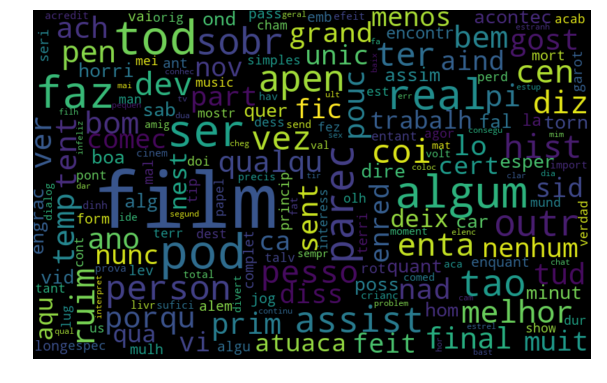

In [24]:
nuvem_palavras_neg(resenha, "tratamento_Completo")

In [25]:
def nuvem_palavras_pos(texto, coluna_texto):
    texto_positivo = texto.query("sentiment == 'pos'")
    todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])
    nuvem_palavras = WordCloud(width = 800, height = 500,
                                max_font_size=110, collocations=False).generate(todas_palavras)
    plt.figure(figsize=(10,7))
    plt.imshow(nuvem_palavras, interpolation='bilinear')
    plt.axis('off')
    plt.show()

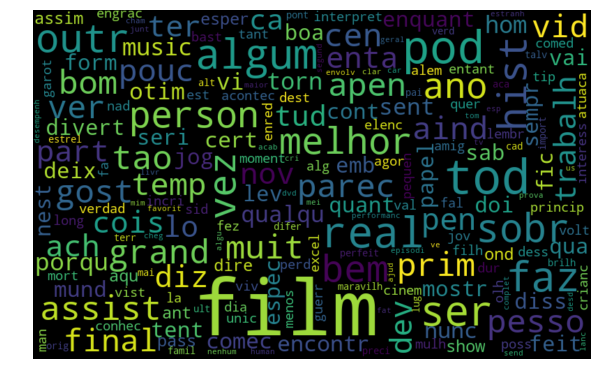

In [26]:
nuvem_palavras_pos(resenha, "tratamento_Completo")

Tabela das palavras mais frequentes

In [31]:
def pareto(texto, coluna_texto, quantidade):
    
    token_espaco = tokenize.WhitespaceTokenizer() #Ferrameta que separa nos espaços em branco
    
    todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
    frequencia = nltk.FreqDist(token_espaco.tokenize(todas_palavras))
    df_frequencia = pd.DataFrame({"Palavra": list(frequencia.keys()),
                                 "Frequência": list(frequencia.values())})
    df_frequencia = df_frequencia.nlargest(columns = "Frequência", n = quantidade)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequencia, x= "Palavra", y = "Frequência", color = 'gray')
    ax.set(ylabel = "Contagem")
    plt.show()   

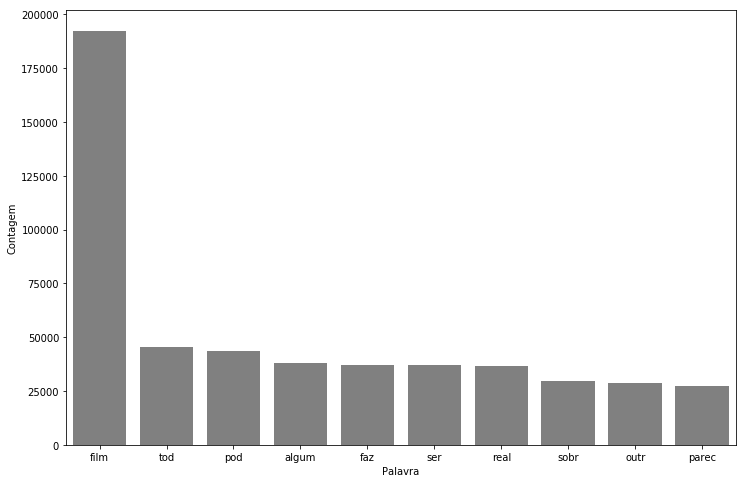

In [32]:
pareto(resenha, "tratamento_Completo", 10)

# Método TF-IDF e Ngrams: técnicas mais avançadas

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

def MetodoTfidfVectorizer(texto, coluna_texto, coluna_classificacao):

    #correlaciona as palavras com sua vizinhança (ngram_range representa o numero de palavras correlacionadas)
    tfidf = TfidfVectorizer(lowercase=False, ngram_range = (1,2))
    vetor_tfidf = tfidf.fit_transform(texto[coluna_texto])

    treino, teste, classe_treino, classe_teste = train_test_split(vetor_tfidf,
                                                              texto[coluna_classificacao],
                                                              random_state = 42)
    
    regressao_logistica = LogisticRegression(solver="lbfgs")
    regressao_logistica.fit(treino, classe_treino)
    return regressao_logistica, tfidf, regressao_logistica.score(teste, classe_teste)

In [35]:
tic =time.time()
modelo,tfidf,acuracia_tfidf_ngrams = MetodoTfidfVectorizer(resenha, "tratamento_Completo", "classificacao")
tac = time.time()
tempo_passado = tac - tic
print("Tempo %.2f segundos" % tempo_passado)

print(acuracia_tfidf_ngrams)

Tempo 49.81 segundos
0.8858067124949454


Analizando palavras com maior importância

In [36]:
pesos = pd.DataFrame(
    modelo.coef_[0].T,
    index = tfidf.get_feature_names()
)

In [37]:
print("Palavras positivas")
pesos.nlargest(15,0)

Palavras positivas


,0
otim,9.883450
excel,8.998262
perfeit,6.908941
maravilh,6.277721
favorit,5.889138
incri,5.746365
divert,5.411681
brilh,4.856791
ador,4.570458
hoj,4.491225


In [38]:
print("Palavras negativas")
pesos.nsmallest(15,0)

Palavras negativas


,0
ruim,-11.762692
pi,-11.424983
horri,-9.702011
terri,-8.386485
nad,-7.610884
chat,-7.508167
parec,-6.628275
nenhum,-6.370131
tent,-5.774768
mal,-5.710569
